In [1]:
from __future__ import print_function

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

sb.set(font_scale=2)

In [2]:
data = pd.read_csv("../catalogs/matched/galsvm-ngcas-asterism-cuts_20160530.csv")

In [13]:
params_classic = [
    'morp_conc_ic',
    'morp_asymm_ic',
    'morp_clumpiness_ic',
    'morp_Gini_ic',
    'morp_M20_ic'
]

params_deprojected = [
    'morp_conc_fc',
    'morp_asymm_fc',
    'morp_clumpiness_fc',
    'morp_Gini_fc',
    'morp_M20_fc'
]

params = params_classic + params_deprojected

dict_lims = dict(
    morp_conc_ic=[1, 5],
    morp_asymm_ic=[0, 0.5],
    morp_clumpiness_ic=[0, 12],
    morp_Gini_ic=[0, 1],
    morp_M20_ic=[-3, 0],
    morp_conc_fc=[1, 5],
    morp_asymm_fc=[0, 0.5],
    morp_clumpiness_fc=[0, 12],
    morp_Gini_fc=[0, 1],
    morp_M20_fc=[-3, 0])

dict_title = dict(
    morp_conc_ic="Concentration classic",
    morp_asymm_ic='Asymmetry classic',
    morp_clumpiness_ic='Clumpiness classic',
    morp_Gini_ic='Gini classic',
    morp_M20_ic=r'$M_{20}$ classic',
    morp_conc_fc="Concentration deprojected",
    morp_asymm_fc='Clumpiness deprojected',
    morp_clumpiness_fc='Smoothness deprojected',
    morp_Gini_fc='Gini deprojected',
    morp_M20_fc=r'$M_{20}$ deprojected'
)

params_plot = [
    'morp_conc_ic', 'morp_conc_fc',
    'morp_asymm_ic', 'morp_asymm_fc',
    'morp_clumpiness_ic', 'morp_clumpiness_fc',
    'morp_Gini_ic', 'morp_Gini_fc',
    'morp_M20_ic', 'morp_M20_fc']

In [4]:
# ASTErIsM outliers are set to -100
data = data.replace(-100, np.nan)

In [5]:
early_type = (data.bt > 0.5)
late_type = (data.bt <= 0.5)
print("Number of early type galaxies : %d and late type ones : %d" % (early_type.sum(), late_type.sum()))

Number of early type galaxies : 220 and late type ones : 1345


In [6]:
pure_early_type = data.cut10_mag3 & early_type
pure_late_type = data.cut10_mag3 & late_type
print("Number of lonely early type galaxies : %d and late type ones : %d" % (pure_early_type.sum(), pure_late_type.sum()))

Number of lonely early type galaxies : 144 and late type ones : 987


In [7]:
def plot_histograms_bt_list(parameters, cuts, bins=30, suffix=''):
    cut1, cut2 = cuts

    fig, axes = plt.subplots(5, 2, figsize=(16, 30))
    for idx, ax in enumerate(axes.flat):
        param = parameters[idx]
        sb.distplot(data[param][cut1].dropna(), ax=ax, rug=True, axlabel=False, label='B/T > 0.5')
        sb.distplot(data[param][cut2].dropna(), ax=ax, rug=True, axlabel=False, label='B/T < 0.5')
        ax.set_xlabel(dict_title[params_plot[idx]])
        ax.set_xlim(dict_lims[params_plot[idx]])
        plt.setp(ax, yticks=[])
        if idx % 2:
            ax.legend(loc='best')
    fig.tight_layout()
    if suffix:
        fig.savefig('ASTErIsM_vs_bt%s.png' % suffix)

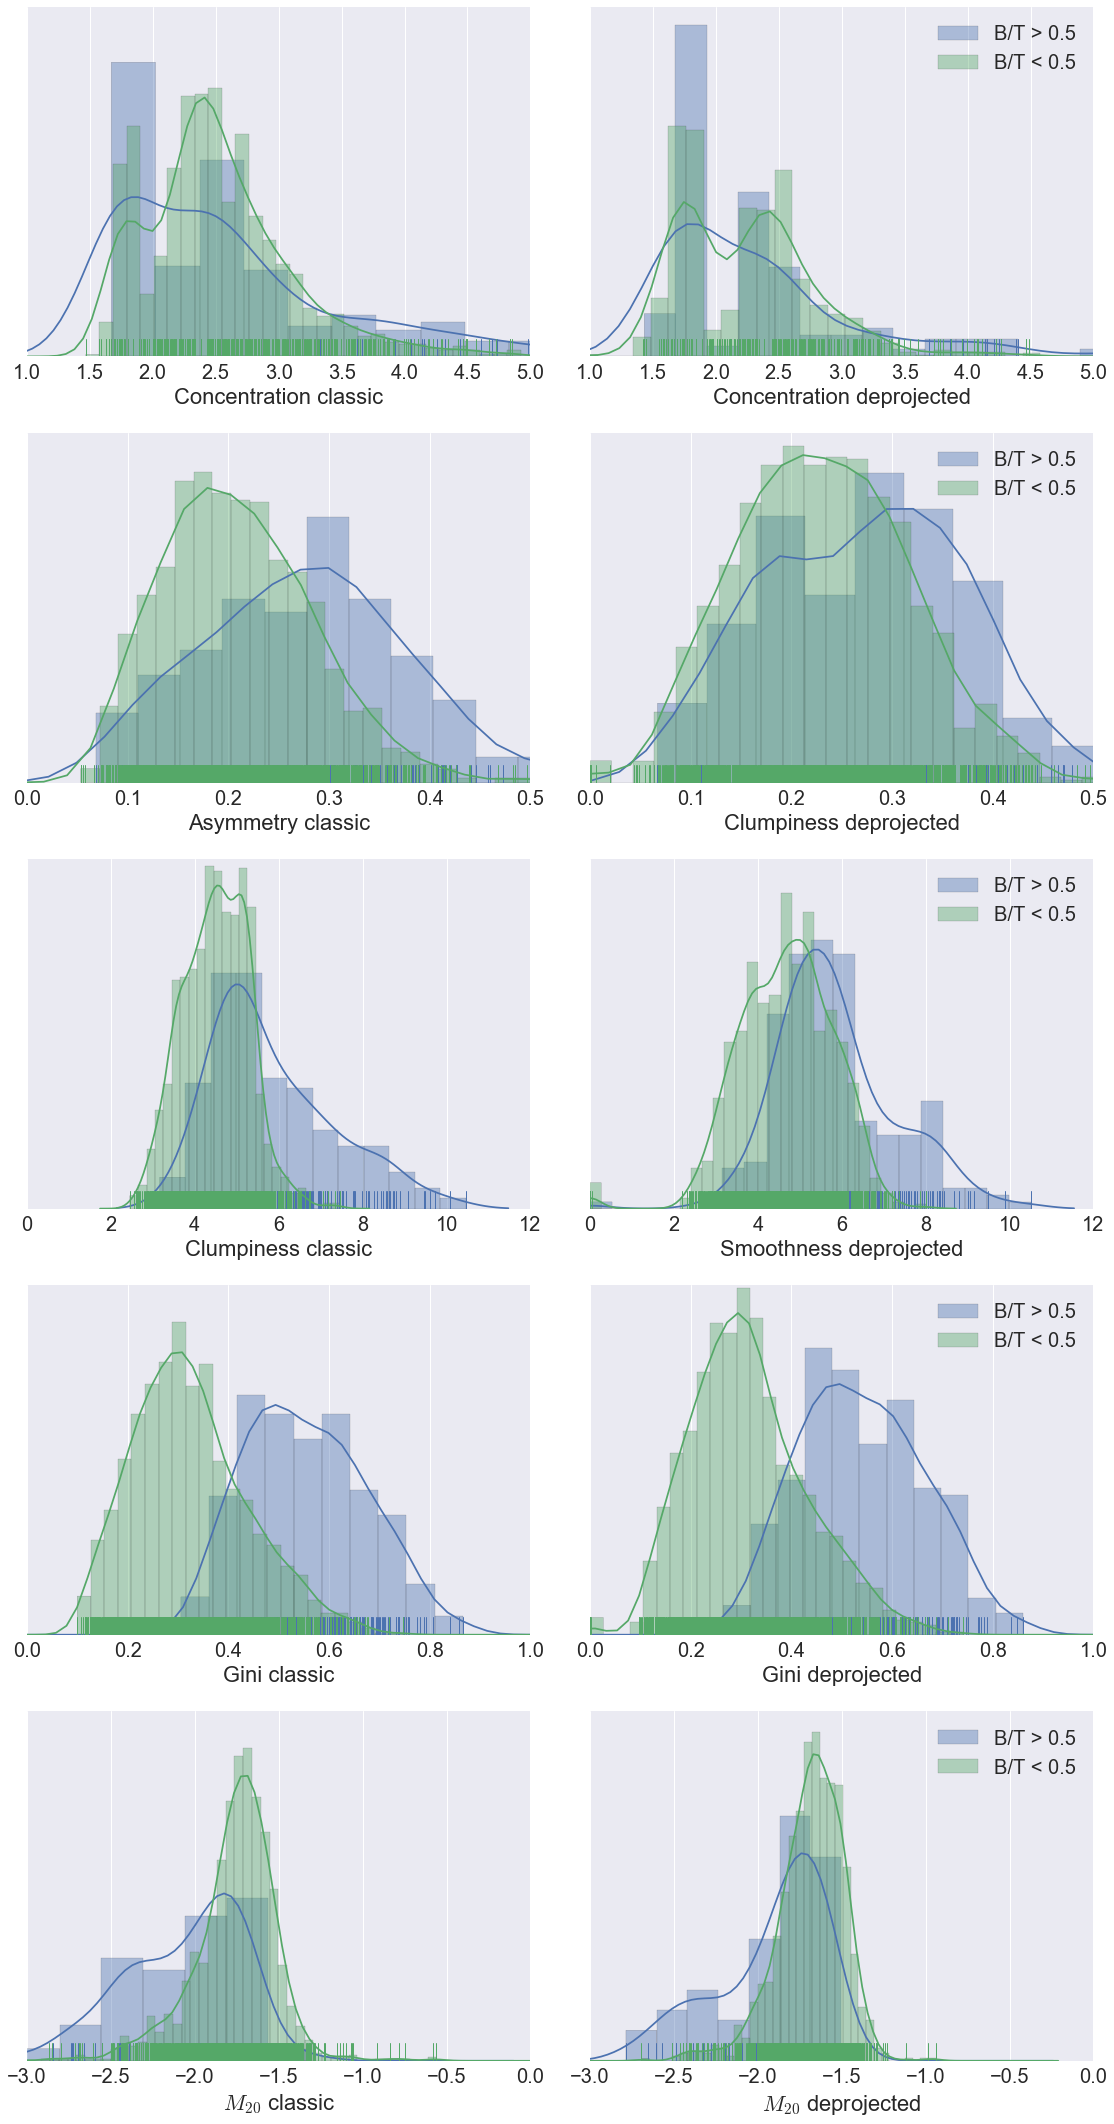

In [8]:
plot_histograms_bt_list(params_plot, [early_type, late_type], suffix='_full')

In [9]:
ltdata = data.copy()[late_type]
etdata = data.copy()[early_type]
pltdata = data.copy()[pure_late_type]
petdata = data.copy()[pure_early_type]

In [15]:
print("Parameter", "Late Type", "Early Type", "Sigma", sep="\t\t")
for p in params_classic:
    string = "{0:.2f} +/- {1:.2f}"
    mean1, std1 = ltdata[p].mean(), ltdata[p].std()
    mean2, std2 = etdata[p].mean(), etdata[p].std()
    sig = abs(mean1 - mean2) / std1
    print("{:17s}".format(p), string.format(mean1, std1), string.format(mean2, std2), "{0:.1f}".format(sig), sep="\t\t")

Parameter		Late Type		Early Type		Sigma
morp_conc_ic     		2.52 +/- 0.59		2.54 +/- 0.85		0.0
morp_asymm_ic    		0.21 +/- 0.08		0.28 +/- 0.11		0.8
morp_clumpiness_ic		4.51 +/- 0.78		5.85 +/- 1.48		1.7
morp_Gini_ic     		0.32 +/- 0.11		0.55 +/- 0.12		2.0
morp_M20_ic      		-1.76 +/- 0.25		-2.06 +/- 0.34		1.2


In [16]:
print("Parameter", "Late Type", "Early Type", "Sigma", sep="\t\t")
for p in params_deprojected:
    string = "{0:.2f} +/- {1:.2f}"
    mean1, std1 = ltdata[p].mean(), ltdata[p].std()
    mean2, std2 = etdata[p].mean(), etdata[p].std()
    sig = abs(mean1 - mean2) / std1
    print("{:17s}".format(p), string.format(mean1, std1), string.format(mean2, std2), "{0:.1f}".format(sig), sep="\t\t")

Parameter		Late Type		Early Type		Sigma
morp_conc_fc     		2.29 +/- 0.73		2.33 +/- 0.85		0.1
morp_asymm_fc    		0.23 +/- 0.09		0.27 +/- 0.10		0.5
morp_clumpiness_fc		4.68 +/- 1.12		5.84 +/- 1.42		1.0
morp_Gini_fc     		0.31 +/- 0.12		0.54 +/- 0.12		1.9
morp_M20_fc      		-1.69 +/- 0.20		-1.92 +/- 0.32		1.2


In [17]:
print("Parameter", "Late Type", "Early Type", "Sigma", sep="\t\t")
for p in params_classic:
    string = "{0:.2f} +/- {1:.2f}"
    mean1, std1 = pltdata[p].mean(), pltdata[p].std()
    mean2, std2 = petdata[p].mean(), petdata[p].std()
    sig = abs(mean1 - mean2) / std1
    print("{:17s}".format(p), string.format(mean1, std1), string.format(mean2, std2), "{0:.1f}".format(sig), sep="\t\t")

Parameter		Late Type		Early Type		Sigma
morp_conc_ic     		2.52 +/- 0.59		2.51 +/- 0.84		0.0
morp_asymm_ic    		0.20 +/- 0.08		0.28 +/- 0.11		1.0
morp_clumpiness_ic		4.47 +/- 0.77		5.99 +/- 1.54		2.0
morp_Gini_ic     		0.34 +/- 0.12		0.56 +/- 0.12		1.9
morp_M20_ic      		-1.77 +/- 0.24		-2.03 +/- 0.34		1.1


In [18]:
print("Parameter", "Late Type", "Early Type", "Sigma", sep="\t\t")
for p in params_deprojected:
    string = "{0:.2f} +/- {1:.2f}"
    mean1, std1 = pltdata[p].mean(), pltdata[p].std()
    mean2, std2 = petdata[p].mean(), petdata[p].std()
    sig = abs(mean1 - mean2) / std1
    print("{:17s}".format(p), string.format(mean1, std1), string.format(mean2, std2), "{0:.1f}".format(sig), sep="\t\t")

Parameter		Late Type		Early Type		Sigma
morp_conc_fc     		2.29 +/- 0.74		2.27 +/- 0.77		0.0
morp_asymm_fc    		0.22 +/- 0.09		0.27 +/- 0.09		0.5
morp_clumpiness_fc		4.64 +/- 1.11		6.02 +/- 1.41		1.3
morp_Gini_fc     		0.33 +/- 0.12		0.55 +/- 0.13		1.9
morp_M20_fc      		-1.69 +/- 0.20		-1.94 +/- 0.34		1.3


In [ ]:
fig, ax = plt.subplots()
seaborn.distplot(dp.a.dropna(), ax=ax, rug=True, axlabel=False, label='galSVM')
seaborn.distplot(dp.a_iraf.dropna(), ax=ax, rug=True, axlabel=False, label='ngCAS')
seaborn.distplot(data2['morp_asymm_fc'], ax=ax, rug=True, axlabel=False, label='ASTErIsM old')
seaborn.distplot(data['morp_asymm_fc'], ax=ax, rug=True, axlabel=False, label='ASTErIsM new')
ax.set_xlabel('Asymmetry')
ax.set_xlim(-0.2, 1.2)
plt.setp(ax, yticks=[])
ax.legend(loc='best')
fig.tight_layout()
plt.savefig('asymmetry_comparison_fine_grid_fc.png')